<a href="https://colab.research.google.com/github/LucasChomyszak/Computer_Vision/blob/main/Im_Seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import sklearn as sk
import skimage as ski
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from skimage.color import rgb2gray


Dog_Og=io.imread('2008_004653.jpg')

Dog_Expert=io.imread('2008_004653.png')
Dog_Expert= rgb2gray(Dog_Expert)

Dog_Expert=Dog_Expert/Dog_Expert.max()

Dog_Expert=Dog_Expert*255

Dog_Expert8b=Dog_Expert.astype(np.uint8)

Dog_gray=rgb2gray(Dog_Og)




In [21]:
Dog_gray=Dog_gray/Dog_gray.max()

Dog_gray=Dog_gray*255

Dog_gray8b=Dog_gray.astype(np.uint8)

Dog_gray8b

array([[108,  99, 100, ...,  54,  50,  46],
       [100, 100, 105, ...,  70,  61,  48],
       [ 87, 105, 102, ...,  91,  79,  57],
       ...,
       [227, 228, 218, ..., 184, 193, 199],
       [222, 227, 217, ..., 188, 193, 197],
       [220, 221, 218, ..., 187, 188, 192]], dtype=uint8)

In [42]:
Dog_Flat=Dog_gray8b.reshape(Dog_gray8b.shape[0]*Dog_gray8b.shape[1],1)

Dog_Kmeans=KMeans(n_clusters=2,random_state=0).fit(Dog_Flat)

Im_Dog_Cluster = Dog_Kmeans.predict(Dog_Flat)
Im_Dog_Cluster= np.logical_not(Im_Dog_Cluster)

DogPrime=np.array(Im_Dog_Cluster).reshape(Dog_gray.shape[0],Dog_gray.shape[1])

DogPrime.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(245, 400)

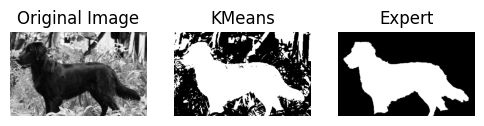

In [43]:
from matplotlib import gridspec

fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(1, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(Dog_gray, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(DogPrime, cmap=plt.cm.gray)
ax2.set_title('KMeans')
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[0,2])
ax3.imshow(Dog_Expert, cmap=plt.cm.gray)
ax3.set_title('Expert')
ax3.set_axis_off()

plt.show()